In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

In [ ]:
#!pip install factor_analyzer

In [3]:
df=pd.read_csv("F:/ML/wine.csv")

In [4]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
from sklearn import datasets

In [6]:
from sklearn.preprocessing import RobustScaler
wine=datasets.load_wine()
x=wine.data
y=wine.target
target_names=wine.target_names
rs=RobustScaler()
x=pd.DataFrame(rs.fit_transform(x))
pca=PCA(n_components=13)
wine_x=pca.fit(x).transform(x)

In [7]:
wine_x

array([[ 2.22439973e+00, -1.12217460e+00, -1.89205390e-01, ...,
         5.23724928e-01, -5.04630661e-01, -4.58759838e-02],
       [ 1.51320309e+00,  4.55374275e-01, -1.49525162e+00, ...,
        -1.08092068e-01, -2.63087569e-01,  9.80153343e-04],
       [ 1.69473184e+00, -9.88510446e-01,  7.07439642e-01, ...,
        -1.59184562e-01, -5.05227871e-02,  4.15662037e-02],
       ...,
       [-1.73890857e+00, -1.86153517e+00, -1.11461227e+00, ...,
        -3.97058483e-01, -3.22168525e-01,  2.53301648e-02],
       [-1.49101156e+00, -1.56896370e+00, -6.86769332e-01, ...,
        -1.62397851e-01, -2.31184165e-01, -2.94307635e-02],
       [-2.39721839e+00, -1.94563090e+00,  4.05386934e-01, ...,
         3.93119640e-01,  1.57294759e-01, -1.94396712e-01]])

In [8]:
print(pca.explained_variance_ratio_)

[0.32853032 0.19681405 0.12684328 0.07788489 0.06968107 0.05607506
 0.04809657 0.02541638 0.02091117 0.01754752 0.01609249 0.01032585
 0.00578135]


In [9]:
target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [11]:
import numpy as np
var=np.sum(pca.explained_variance_[0:7])
print(var)
var_percentage=np.sum(pca.explained_variance_ratio_[0:7])*100
print(var_percentage,'%')

5.865748769280508
90.39252472402619 %


In [12]:
pca.explained_variance_

array([2.13189786, 1.2771651 , 0.82311103, 0.50541037, 0.4521742 ,
       0.36388209, 0.31210811, 0.16493188, 0.13569671, 0.1138693 ,
       0.10442731, 0.06700648, 0.0375163 ])

Text(0, 0.5, 'the explained variance')

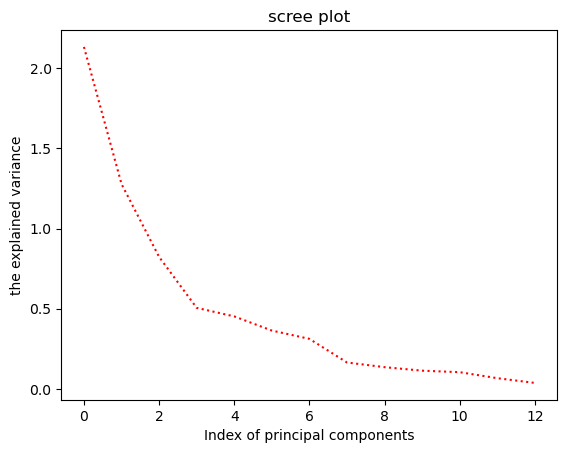

In [36]:
import matplotlib.pyplot as plt
figure=plt.figure()
ax=plt.gca()
plt.plot(pca.explained_variance_,color="red",linestyle='dotted')
ax.set_title("scree plot")
ax.set_xlabel("Index of principal components")
ax.set_ylabel("the explained variance")

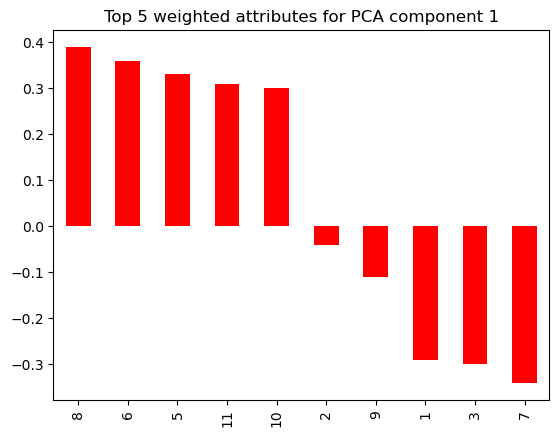

8     0.39
6     0.36
5     0.33
11    0.31
10    0.30
2    -0.04
9    -0.11
1    -0.29
3    -0.30
7    -0.34
Name: 0, dtype: float64

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def feature_weight(pca, n_comp, n_feat, color='blue'):
    # Ensure the component index is within the correct range
    if n_comp < 1 or n_comp > len(pca.components_):
        raise ValueError("n_comp should be between 1 and the number of PCA components")
    # Extract and process the desired component
    comp = pd.DataFrame(np.round(pca.components_, 2), columns=x.keys()).iloc[n_comp - 1]
    comp.sort_values(ascending=False, inplace=True)
    comp = pd.concat([comp.head(n_feat), comp.tail(n_feat)])   
    # Plot the result with the specified color
    comp.plot(kind='bar', color=color, title='Top {} weighted attributes for PCA component {}'.format(n_feat, n_comp))
    plt.show()
    return comp
# Example usage
feature_weight(pca, 1, 5, color='red')


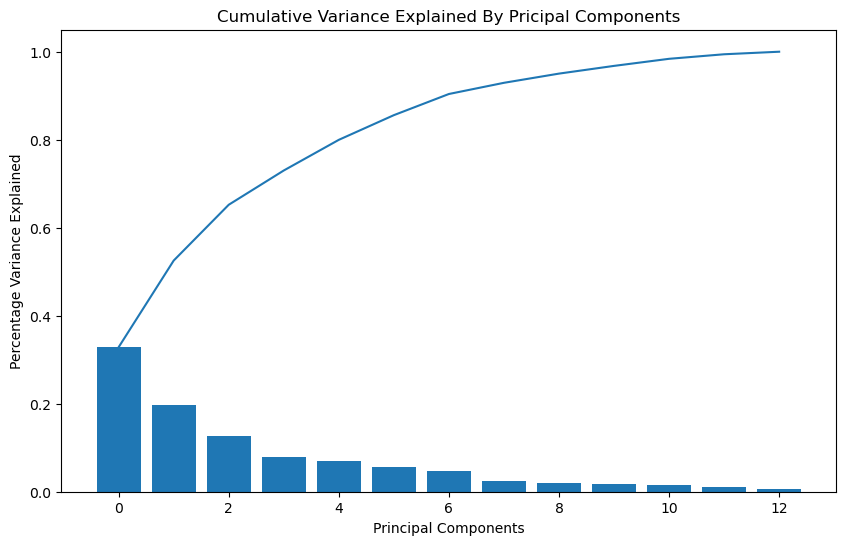

In [31]:
def screeplot(pca):
    var_len=len(pca.explained_variance_ratio_)
    indx=np.arange(var_len)
    var_pca=pca.explained_variance_ratio_
    plt.figure(figsize=(10,6))
    ax=plt.subplot()
    cum_var=np.cumsum(var_pca)
    ax.bar(indx,var_pca)
    ax.plot(indx,cum_var)
    ax.set_xlabel("Principal Components")
    ax.set_ylabel("Percentage Variance Explained")
    plt.title("Cumulative Variance Explained By Pricipal Components")
screeplot(pca)
    